# Hypotheses Test 3

#### $H0$: There is no significant relationship between age and the adaptation towards the specificity of learning computations.
#### $H_A$: Adaptation towards the specificity of learning computations increases/decreases with age. 

In [125]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

##  Data Processing

#### We merge the data based on subject IDs. We need to combine subject data with learning data, as learning performance reflects adaptation towards specific representations.

In [50]:
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv") 
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")

# Merge dataframes
learning_merged = pd.merge(e1_learning, e1_sub_ages, on='subject_id')

In [51]:
e1_sub_ages.head()

,subject_id,age
0,3768,8.04
1,3770,8.10
2,3855,16.83
3,3853,16.94
4,3898,22.15


In [52]:
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [53]:
learning_merged.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made,age
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0,8.04
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0,8.04
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0,8.04
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0,8.04
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0,8.04


In [55]:
learning_data = learning_merged[['age', 'block_condition', 'correct_response_made']]
learning_data.head()

,age,block_condition,correct_response_made
0,8.04,2,1.0
1,8.04,2,1.0
2,8.04,2,0.0
3,8.04,2,1.0
4,8.04,2,0.0


In [56]:
# Check for missing values
print("Missing values in learning data:")
print(learning_merged.isnull().sum())


# Remove missing values if any
learning_merged.dropna(inplace=True)

Missing values in learning data:
subject_id                 0
task_part                  0
block_condition            0
block_order                0
task_block                 0
trial_index                0
stimulus                   0
cat_type                   0
mean_cat_reward            0
approach_reward            0
key_press                174
rt                       168
points                     0
stimulus_repetition        0
correct_response           0
correct_response_made    174
age                        0
dtype: int64


In [61]:
# split into age groups
learning_merged['age_group'] = pd.cut(learning_merged['age'], bins=[0, 13, 18, float('inf')], labels=['Children', 'Adolescents', 'Adults'])
learning_merged.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made,age,age_group
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0,8.04,Children
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0,8.04,Children
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0,8.04,Children
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0,8.04,Children
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0,8.04,Children


In [81]:
learning_data.dtypes

age                       float64
block_condition             int64
correct_response_made     float64
age_group                category
dtype: object

## Statistical Analysis on Learning Data Vs Age

### Age Vs Correct Response Made

In [63]:
children_data = learning_data[learning_data['age'] <= 13]
adolescents_data = learning_data[(learning_data['age'] > 13) & (learning_data['age'] <= 18)]
adults_data = learning_data[learning_data['age'] > 18]

print("Number of people in each age group:")
print("Children:", len(children_data['age']))
print("Adolescents:", len(adolescents_data['age']))
print("Adults:", len(adults_data['age']))

Number of people in each age group:
Children: 15300
Adolescents: 15300
Adults: 15606


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


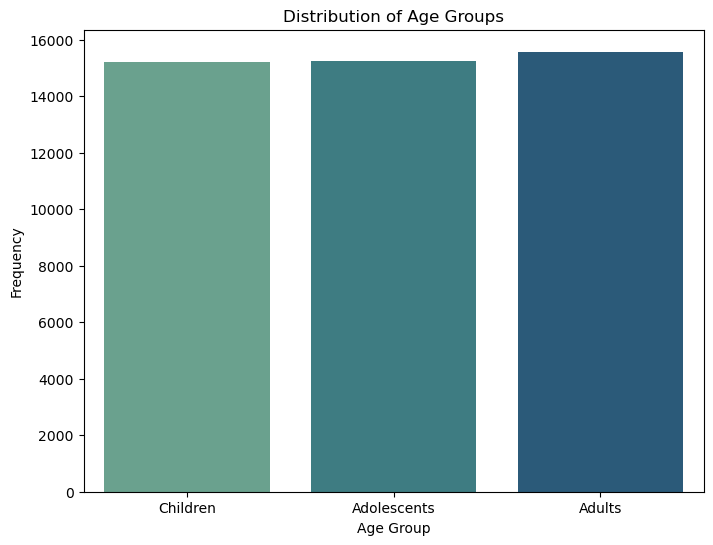

In [167]:
# visualize the distribution of age groups
plt.figure(figsize=(8, 6))
sns.countplot(data=learning_data, x='age_group', palette='crest')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Group the data by age groups and count correct and incorrect responses
correct_responses_by_age = learning_data.groupby('age')['correct_response_made'].sum()
total_responses_by_age = learning_data.groupby('age')['correct_response_made'].count()

# Calculate the proportion of correct responses for each age group
proportion_correct_by_age = correct_responses_by_age / total_responses_by_age

print("Proportion of correct responses made by each age group:")
print(proportion_correct_by_age)


Proportion of correct responses made by each age group:
age
8.01     0.632280
8.03     0.580065
8.04     0.761589
8.05     0.560656
8.10     0.695082
           ...   
25.06    0.769608
25.29    0.830065
25.31    0.787582
25.87    0.751634
25.94    0.713816
Name: correct_response_made, Length: 147, dtype: float64


In [67]:

# Calculate the proportion of correct responses for each age group
adults_proportion_correct = adults_data['correct_response_made'].mean()
adolescents_proportion_correct = adolescents_data['correct_response_made'].mean()
children_proportion_correct = children_data['correct_response_made'].mean()

print("Proportion of correct responses made by each age group:")
print("Adults:", adults_proportion_correct)
print("Adolescents:", adolescents_proportion_correct)
print("Children:", children_proportion_correct)


Proportion of correct responses made by each age group:
Adults: 0.7448475120385233
Adolescents: 0.7136953955135773
Children: 0.6777989612780225


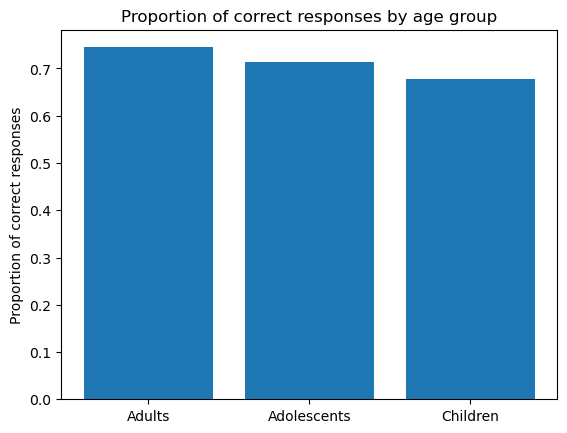

In [68]:
# plotting
fig, ax = plt.subplots()
ax.bar(['Adults', 'Adolescents', 'Children'], [adults_proportion_correct, adolescents_proportion_correct, children_proportion_correct])
ax.set_ylabel('Proportion of correct responses')
ax.set_title('Proportion of correct responses by age group')
plt.show()



> It appears that adults tend to have a higher proportion of correct responses than teenagers and children.

### Assess the relationship between learning performance(`correct_response_made`) and learning specificity (`block_condition`)

In [87]:
# Convert 'block_condition' to categorical
learning_merged['block_condition'] = learning_merged['block_condition'].astype('category')
learning_merged.dtypes

subject_id                  int64
task_part                  object
block_condition          category
block_order                 int64
task_block                 object
trial_index                 int64
stimulus                   object
cat_type                   object
mean_cat_reward             int64
approach_reward            object
key_press                  object
rt                        float64
points                      int64
stimulus_repetition         int64
correct_response            int64
correct_response_made    category
age                       float64
age_group                category
dtype: object

#### Chi-square test of independence

The chi-square test of independence is chosen here because it assesses the association between two categorical variables, which are `correct_response_made`(categorical) and `block_condition` (categorical). This test helps determine if there is a significant relationship between these two variables.

In [89]:
contingency_table = pd.crosstab(learning_merged['block_condition'], learning_merged['correct_response_made'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# results
print("Chi-square Test Results for Block Condition vs. Correct Response Made:")
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)


Chi-square Test Results for Block Condition vs. Correct Response Made:
Chi-square Statistic: 21.981247372687992
P-value: 2.7532748736828756e-06


> There is an association between the block condition and the correct response made. 

In [154]:
# Group the data by block condition and correct response made, and then count the occurrences
response_counts = learning_merged.groupby(['block_condition', 'correct_response_made']).size().reset_index(name='count')

# Print the count for each block condition and correct response
print(response_counts)


  block_condition correct_response_made  count
0               1               Correct  16632
1               1             Incorrect   6395
2               2               Correct  16160
3               2             Incorrect   6845


/tmp/ipykernel_93373/3319157441.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_counts = learning_merged.groupby(['block_condition', 'correct_response_made']).size().reset_index(name='count')


#### Visualisation

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


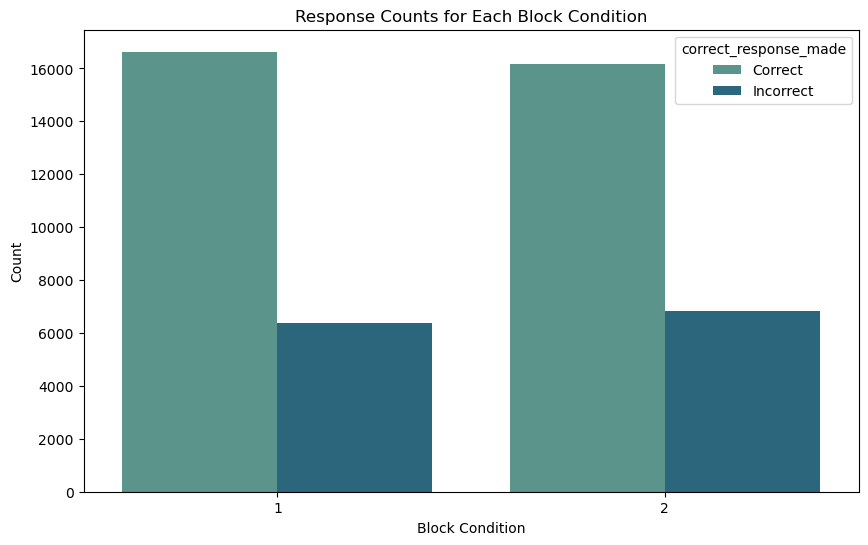

In [169]:
# Plot the response counts
plt.figure(figsize=(10, 6))
sns.barplot(data=response_counts, x='block_condition', y='count', hue='correct_response_made', palette='crest')
plt.title('Response Counts for Each Block Condition')
plt.xlabel('Block Condition')
plt.ylabel('Count')
plt.show()

### Assess the relationship between `age_group` and `correct_response_made` within each block condition

#### Chi-square test of independence

##### We perform a chi-square test of independence to assess the relationship between age group (categorical) and correct response made (categorical) within each block condition.

Reason: 
- The test is chosen because it evaluates the association between two categorical variables (age group and correct response made) and helps determine if there is a significant relationship.

In [69]:
# Convert numeric values to categorical values in the 'correct_response_made' column
learning_merged['correct_response_made'] = learning_merged['correct_response_made'].map({1: 'Correct', 0: 'Incorrect'})
learning_merged.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made,age,age_group
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,Correct,8.04,Children
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,Correct,8.04,Children
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,Incorrect,8.04,Children
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,Correct,8.04,Children
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,Incorrect,8.04,Children


In [72]:
# Block condition 1
block_condition_1_data = learning_merged[learning_merged['block_condition'] == 1]
contingency_table_1 = pd.crosstab(block_condition_1_data['age_group'], block_condition_1_data['correct_response_made'])
chi2_1, p_value_1, _, _ = chi2_contingency(contingency_table_1)
print("\nChi-square Test Results for Block Condition 1:")
print("Chi-square Statistic:", chi2_1)
print("P-value:", p_value_1)


Chi-square Test Results for Block Condition 1:
Chi-square Statistic: 79.0181611143556
P-value: 6.941036512237949e-18


In [73]:
# Block condition 2
block_condition_2_data = learning_merged[learning_merged['block_condition'] == 2]
contingency_table_2 = pd.crosstab(block_condition_2_data['age_group'], block_condition_2_data['correct_response_made'])
chi2_2, p_value_2, _, _ = chi2_contingency(contingency_table_2)
print("\nChi-square Test Results for Block Condition 2:")
print("Chi-square Statistic:", chi2_2)
print("P-value:", p_value_2)


Chi-square Test Results for Block Condition 2:
Chi-square Statistic: 93.93500946114119
P-value: 4.001951920832369e-21


> The chi-square test results provide a measure of the association between age group and correct response made within each block condition.

> These results suggest that there is a significant relationship between age group and correct response made within both Block Condition 1 and Block Condition 2. 

#### Post Hoc tests

Pairwise chi-square tests (Bonferroni corrected) is performed to compare correct response rates between different age groups within each block condition.


Reasons: 
- Comparing Multiple Groups: we have more than two groups (in this case, different age groups) and want to compare each group against each other, pairwise tests are necessary to examine the specific differences between groups.

- Correcting for Multiple Comparisons: Bonferroni correction is applied to address the issue of multiple comparisons. When you perform multiple tests, the probability of obtaining a significant result by chance increases. Bonferroni correction adjusts the significance level (alpha) to maintain an overall family-wise error rate.

- To identify Specific Group Difference


In [126]:

def pairwise_chi_square(data, group_col, response_col, block_condition_col):
    results = []
    block_conditions = data[block_condition_col].unique()
    for block_condition in block_conditions:
        block_condition_data = data[data[block_condition_col] == block_condition]
        age_groups = block_condition_data[group_col].unique()
        for i in range(len(age_groups)):
            for j in range(i + 1, len(age_groups)):
                age_group1 = age_groups[i]
                age_group2 = age_groups[j]
                contingency_table = pd.crosstab(block_condition_data[group_col], block_condition_data[response_col])
                chi2, p_value, _, _ = chi2_contingency(contingency_table)
                results.append((block_condition, age_group1, age_group2, chi2, p_value))
    return results


In [127]:
# Perform pairwise chi-square tests with Bonferroni correction
pairwise_results = pairwise_chi_square(learning_merged, 'age_group', 'correct_response_made', 'block_condition')

In [128]:
# Bonferroni correction for multiple comparisons
alpha = 0.05
results_corrected = multipletests([result[4] for result in pairwise_results], alpha=alpha, method='bonferroni')


In [129]:
print("Pairwise Chi-square Test Results with Bonferroni Correction:")
for i, result in enumerate(pairwise_results):
    block_condition, age_group1, age_group2, chi2, p_value = result
    rejected = results_corrected[0][i]
    print(f"Block Condition: {block_condition}, Age Groups: {age_group1} vs {age_group2}, Chi-square: {chi2}, P-value: {p_value}, Rejected: {rejected}")


Pairwise Chi-square Test Results with Bonferroni Correction:
Block Condition: 2, Age Groups: Children vs Adolescents, Chi-square: 93.93500946114119, P-value: 4.001951920832369e-21, Rejected: True
Block Condition: 2, Age Groups: Children vs Adults, Chi-square: 93.93500946114119, P-value: 4.001951920832369e-21, Rejected: True
Block Condition: 2, Age Groups: Adolescents vs Adults, Chi-square: 93.93500946114119, P-value: 4.001951920832369e-21, Rejected: True
Block Condition: 1, Age Groups: Children vs Adolescents, Chi-square: 79.0181611143556, P-value: 6.941036512237949e-18, Rejected: True
Block Condition: 1, Age Groups: Children vs Adults, Chi-square: 79.0181611143556, P-value: 6.941036512237949e-18, Rejected: True
Block Condition: 1, Age Groups: Adolescents vs Adults, Chi-square: 79.0181611143556, P-value: 6.941036512237949e-18, Rejected: True


In [109]:
# Group the data by block condition, age group, and correct response made, and then count the occurrences
response_counts_block1 = learning_merged[learning_merged['block_condition'] == 1].groupby(['age_group', 'correct_response_made']).size().reset_index(name='count')
response_counts_block2 = learning_merged[learning_merged['block_condition'] == 2].groupby(['age_group', 'correct_response_made']).size().reset_index(name='count')

/tmp/ipykernel_93373/607038339.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_counts_block1 = learning_merged[learning_merged['block_condition'] == 1].groupby(['age_group', 'correct_response_made']).size().reset_index(name='count')
/tmp/ipykernel_93373/607038339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_counts_block2 = learning_merged[learning_merged['block_condition'] == 2].groupby(['age_group', 'correct_response_made']).size().reset_index(name='count')


In [110]:
print("Block Condition 1:")
response_counts_block1

Block Condition 1:


,age_group,correct_response_made,count
0,Children,Correct,5227
1,Children,Incorrect,2382
2,Adolescents,Correct,5564
3,Adolescents,Incorrect,2066
4,Adults,Correct,5841
5,Adults,Incorrect,1947


In [111]:
print("\nBlock Condition 2:")
response_counts_block2



Block Condition 2:


,age_group,correct_response_made,count
0,Children,Correct,5083
1,Children,Incorrect,2519
2,Adolescents,Correct,5317
3,Adolescents,Incorrect,2299
4,Adults,Correct,5760
5,Adults,Incorrect,2027


#### Visualisations

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


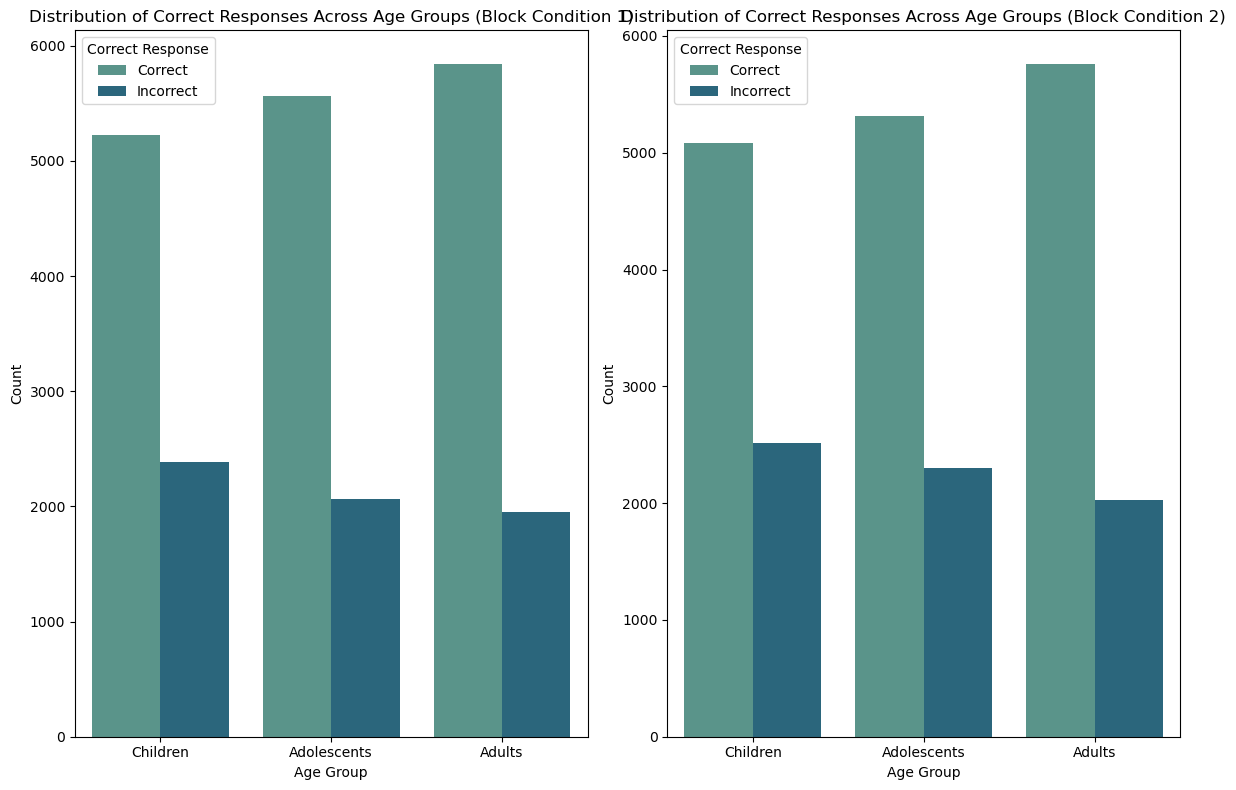

In [170]:
plt.figure(figsize=(12, 8))

# Count plot for Block Condition 1
plt.subplot(1, 2, 1)
sns.countplot(data=learning_merged[learning_merged['block_condition'] == 1], x='age_group', hue='correct_response_made', palette='crest')
plt.title('Distribution of Correct Responses Across Age Groups (Block Condition 1)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Correct Response')

# Count plot for Block Condition 2
plt.subplot(1, 2, 2)
sns.countplot(data=learning_merged[learning_merged['block_condition'] == 2], x='age_group', hue='correct_response_made', palette='crest')
plt.title('Distribution of Correct Responses Across Age Groups (Block Condition 2)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Correct Response')

plt.tight_layout()
plt.show()


> In both block conditions, adults tend to have the highest number of correct responses, followed by adolescents and then children and this effect is more for Block Condition 1. 

> The hypothesis being tested is whether there is a significant relationship between age group and the adaptation towards the specificity of learning computations, so we are focussed on Block condition 2. 

#### Assess relationship between age and correct response made within the exemplar predictive block condition.

#### Independent Samples T-test

The Independent Samples T-test for each pair of age groups within Block Condition 1 is performed to assess whether there is a significant difference in the mean correct response made between two age groups (e.g., children vs. adolescents, children vs. adults, adolescents vs. adults) within the exemplar predictive block condition.

Reason:

- The choice of this test is based on the nature of the data, which includes two independent categorical variables (age group and correct response made) and one continuous variable (mean correct response).

In [118]:

# Convert 'Correct' and 'Incorrect' to numerical values 
learning_merged['correct_response_numeric'] = learning_merged['correct_response_made'].map({'Correct': 1, 'Incorrect': 0})

# Filter the data for Block Condition 2
block_condition_2_data = learning_merged[learning_merged['block_condition'] == 2]

In [119]:
# Separate the data into different age groups
children_data_bc2 = block_condition_2_data[block_condition_2_data['age_group'] == 'Children']['correct_response_numeric']
adolescents_data_bc2 = block_condition_2_data[block_condition_2_data['age_group'] == 'Adolescents']['correct_response_numeric']
adults_data_bc2 = block_condition_2_data[block_condition_2_data['age_group'] == 'Adults']['correct_response_numeric']

In [123]:
t_stat_child_ado, p_value_child_ado = ttest_ind(children_data_bc2, adolescents_data_bc2)
print("Independent Samples T-test Results for Block Condition 2:")
print("\nChildren vs Adolescents:")
print("T-statistic:", t_stat_child_ado)
print("P-value:", p_value_child_ado)

Independent Samples T-test Results for Block Condition 2:

Children vs Adolescents:
T-statistic: -3.91294985098546
P-value: 9.157216251045923e-05


In [121]:
t_stat_child_adult, p_value_child_adult = ttest_ind(children_data_bc2, adults_data_bc2)
print("Independent Samples T-test Results for Block Condition 2:")
print("\nChildren vs Adults:")
print("T-statistic:", t_stat_child_adult)
print("P-value:", p_value_child_adult)


Independent Samples T-test Results for Block Condition 2:

Children vs Adults:
T-statistic: -9.688330495823868
P-value: 3.909830574357572e-22


In [122]:
t_stat_ado_adult, p_value_ado_adult = ttest_ind(adolescents_data_bc2, adults_data_bc2)
print("Independent Samples T-test Results for Block Condition 2:")
print("\nAdolescents vs Adults:")
print("T-statistic:", t_stat_ado_adult)
print("P-value:", p_value_ado_adult)

Independent Samples T-test Results for Block Condition 2:

Adolescents vs Adults:
T-statistic: -5.743768748766688
P-value: 9.433992265474692e-09


#### Visualisations

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


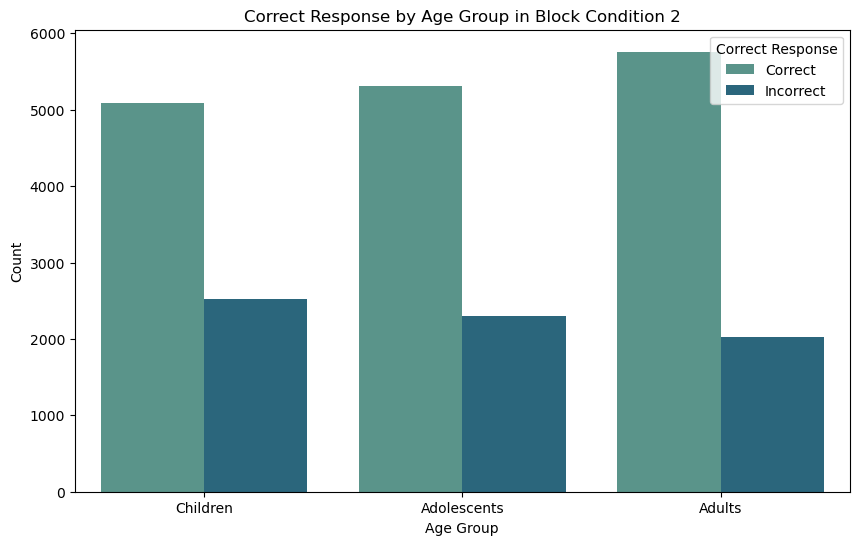

In [171]:
# Filter the data for Block Condition 2
block_condition_2_data = learning_merged[learning_merged['block_condition'] == 2]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=block_condition_2_data, x='age_group', hue='correct_response_made', palette='crest')
plt.title('Correct Response by Age Group in Block Condition 2')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Correct Response', loc='upper right')
plt.show()


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


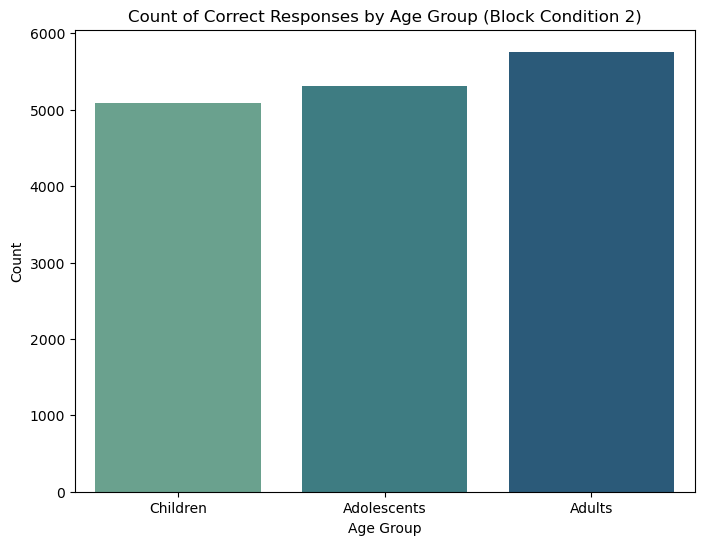

In [172]:
# Count plot of correct responses by age group in block condition 2
plt.figure(figsize=(8, 6))
sns.countplot(data=learning_merged[(learning_merged['block_condition'] == 2) & (learning_merged['correct_response_made'] == 'Correct')],
              x='age_group', palette='crest')
plt.title('Count of Correct Responses by Age Group (Block Condition 2)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


### Final Inferences:

##### **Distribution of Correct Responses by Age Group:**
- Adults tend to have a higher proportion of correct responses than adolescents and children.
- The proportion of correct responses generally increases with age.

##### **Association between Block Condition and Correct Response Made:**
- There is a significant association between block condition and correct response made. Block condition 1 and 2 show slightly different distributions of correct and incorrect responses.

##### **Relationship between Age Group and Correct Response Made within Each Block Condition:**
- **Chi-square tests** indicate a significant relationship between age group and correct response made within both block conditions.
- Post hoc tests (pairwise chi-square tests with Bonferroni correction) reveal specific differences between age groups within each block condition.
- **Independent Samples T-test for Block Condition 2** indicate significant differences exist in the mean correct response made between different age groups within Block Condition 2.

Children vs Adolescents: p-value < 0.05, Reject H0

Children vs Adults: p-value < 0.05, Reject H0

Adolescents vs Adults: p-value < 0.05, Reject H0

> Overall, the analyses suggest that age group influences the adaptation towards the specificity of learning computations. Adults tend to exhibit better learning performance compared to adolescents and children when it comes to specificity of learning computations(block condition 2). 

**Adaptation towards the specificity of learning computations increases with age.**